# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.
8. Price: Cheaper products will have a higher tendency to sell.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [85]:
# import libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
data.shape

(8523, 12)

In [61]:
# Explore the Target Variable

# descriptive statistics
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

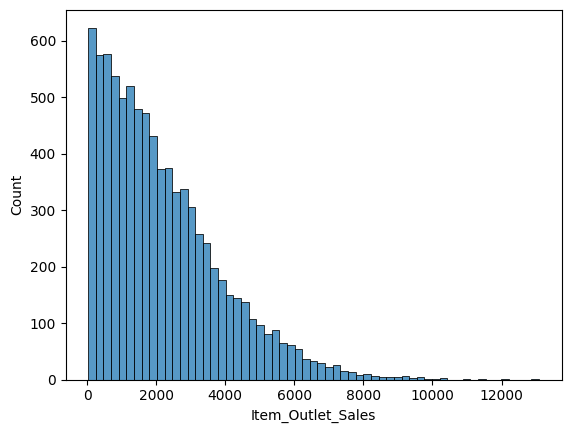

In [62]:
# histogram
sns.histplot(data['Item_Outlet_Sales'])

In [63]:
# all columns

sorted(list(data.columns))

['Item_Fat_Content',
 'Item_Identifier',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [75]:
# categorical variables

cat_feats = data.dtypes[data.dtypes == 'object'].index.tolist()
cat_feats

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [77]:
# numeric variables

num_feats = data.dtypes[(data.dtypes == 'float64') | (data.dtypes == 'int64')].index.tolist()
num_feats

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [73]:
# which variables might be important for predicting Item_Outlet_Sales?

# Item_MRP
# Item_Visibility
# Outlet_Location_Type
# Outlet_Size
# Outlet_Type

<AxesSubplot: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

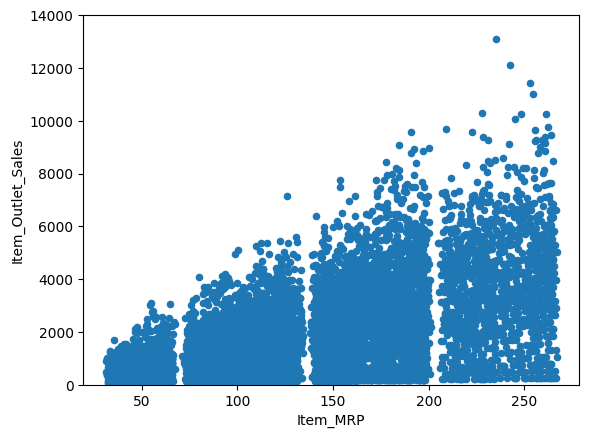

In [67]:
#scatter plot Item_MRP vs. Item_Outlet_Sales
var = 'Item_MRP'
d = data[['Item_Outlet_Sales',var]]
d.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,14000))

<AxesSubplot: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

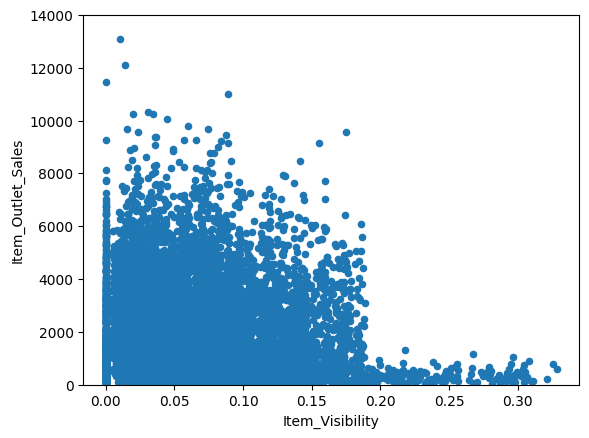

In [69]:
#scatter plot Item_Visibililty vs. Item_Outlet_Sales
var = 'Item_Visibility'
d = data[['Item_Outlet_Sales',var]]
d.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,14000))

In [44]:
# look at correlation between numeric variables and the target variable

C:\Users\User\AppData\Local\Temp\ipykernel_22068\1329673695.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


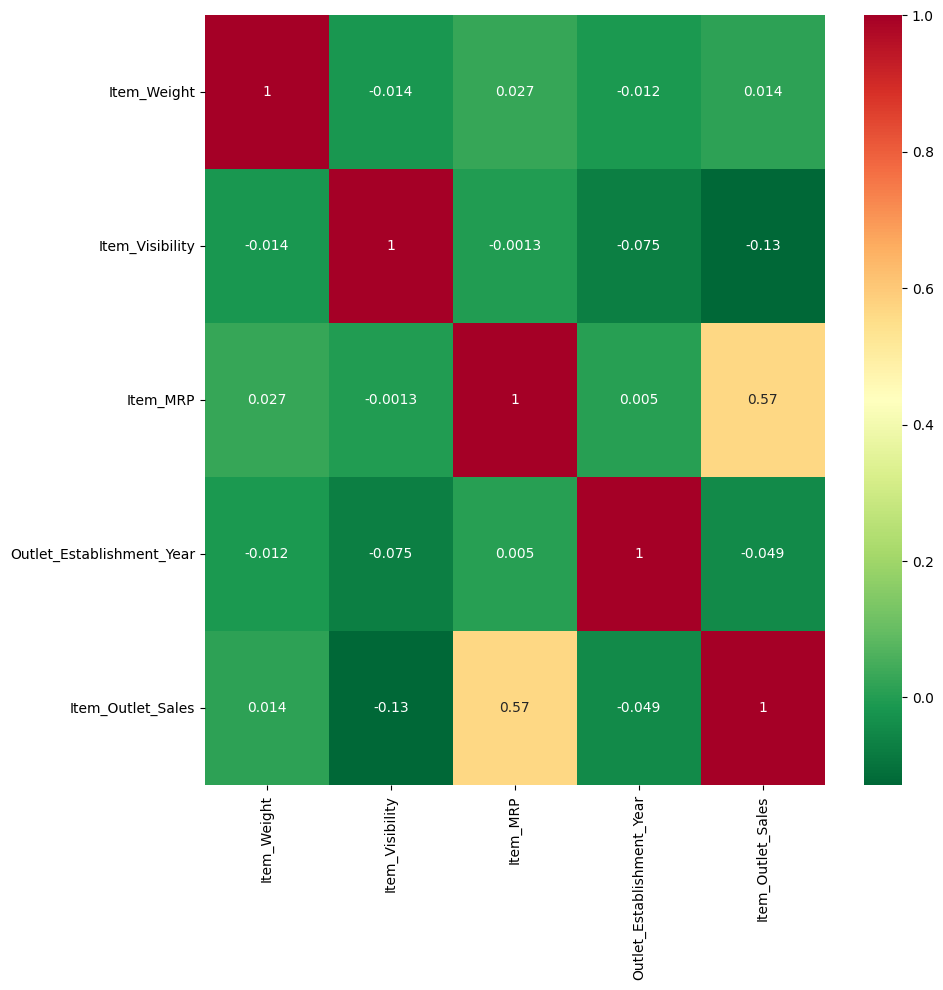

In [51]:
#correlation matrix
# most correlated features with Item_Outlet_Sales
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["Item_Outlet_Sales"])>0]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

(-0.5, 2.5, 0.0, 14000.0)

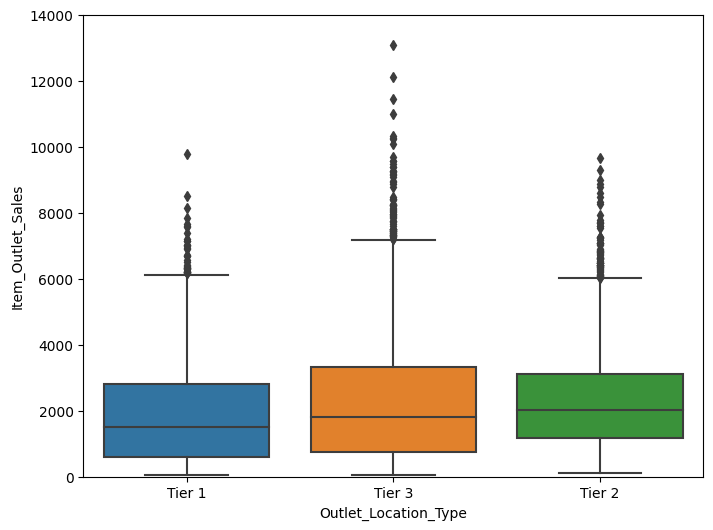

In [70]:
# Outlet_Location_Type
var = 'Outlet_Location_Type'
d = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=d)
fig.axis(ymin=0, ymax=14000)

(-0.5, 2.5, 0.0, 14000.0)

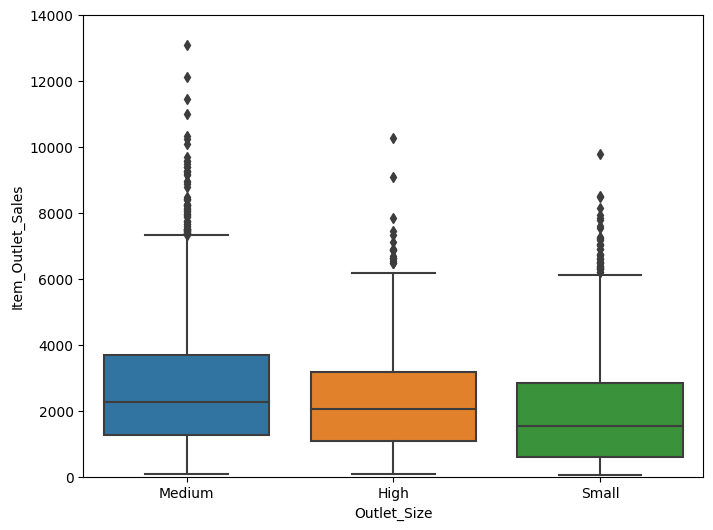

In [71]:
# Outlet_Size
var = 'Outlet_Size'
d = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=d)
fig.axis(ymin=0, ymax=14000)

(-0.5, 3.5, 0.0, 14000.0)

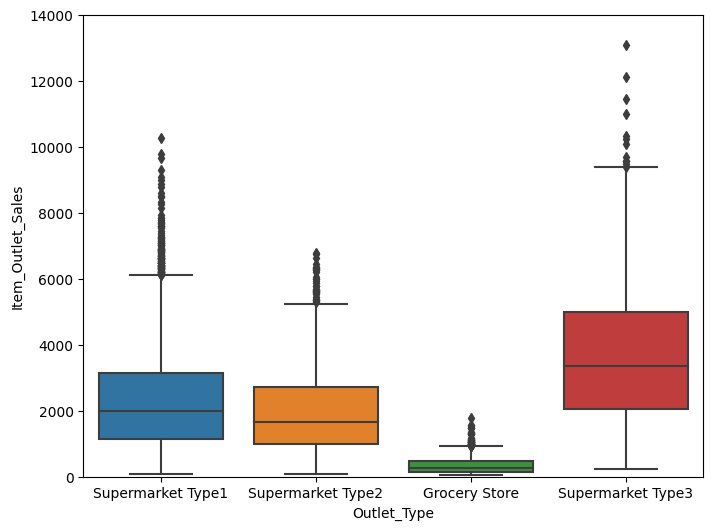

In [72]:
# Outlet_Type
var = 'Outlet_Type'
d = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=d)
fig.axis(ymin=0, ymax=14000)

(-0.5, 4.5, 0.0, 14000.0)

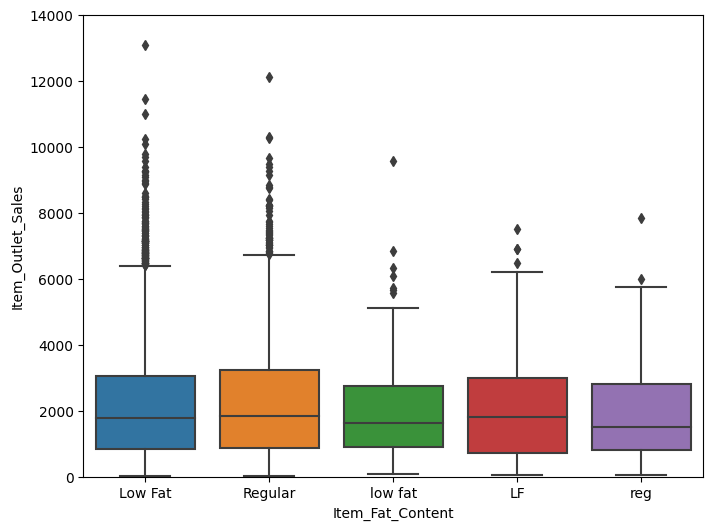

In [78]:
# Item_Fat_Content
var = 'Item_Fat_Content'
d = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=d)
fig.axis(ymin=0, ymax=14000)

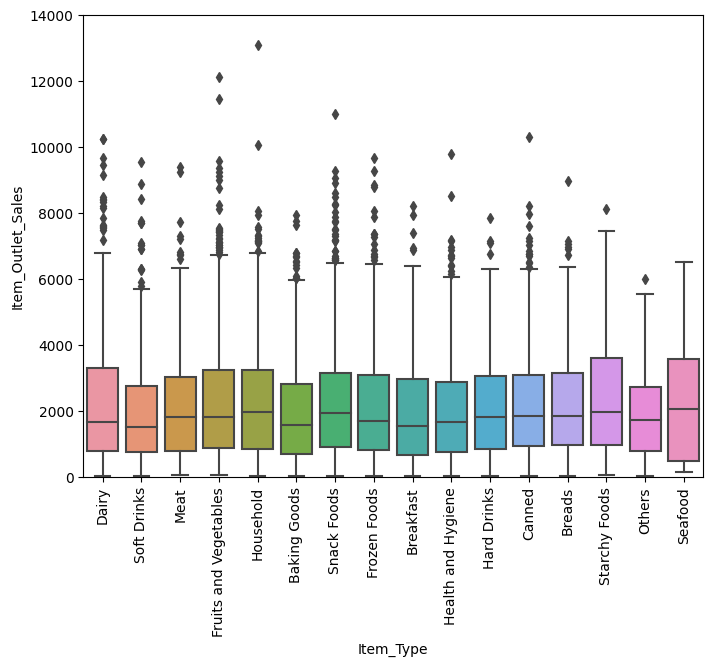

In [81]:
# Item_Type
var = 'Item_Type'
d = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=d)
fig.axis(ymin=0, ymax=14000)
plt.xticks(rotation=90)
plt.show()

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [114]:
# missing data

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
Outlet_Size,2410,0.282764
Item_Identifier,0,0.000000
Item_Weight,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Task:** How many products are there, how many stores, item types?


In [15]:
num_products = data['Item_Identifier'].nunique()
num_products

1559

In [16]:
num_stores = data['Outlet_Identifier'].nunique()
num_stores

10

In [17]:
num_item_types = data['Item_Type'].nunique()
num_item_types

16

**Task:** Explore the numbers of each categorical variable.

In [18]:
cat_feats = data.dtypes[data.dtypes == 'object'].index.tolist()
cat_feats

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
for cat in cat_feats:
    x = data[cat].nunique()
    print(f'{cat} : {x} unique values')

Item_Identifier : 1559 unique values
Item_Fat_Content : 5 unique values
Item_Type : 16 unique values
Outlet_Identifier : 10 unique values
Outlet_Size : 3 unique values
Outlet_Location_Type : 3 unique values
Outlet_Type : 4 unique values


In [20]:
Item_Fat_Types = set(data['Item_Fat_Content'])
Item_Fat_Types

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [21]:
Item_Types = set(data['Item_Type'])
Item_Types

{'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods'}

In [23]:
Outlet_Identifier = set(data['Outlet_Identifier'])
Outlet_Identifier

{'OUT010',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049'}

In [24]:
Outlet_Size = set(data['Outlet_Size'])
Outlet_Size

{'High', 'Medium', 'Small', nan}

In [25]:
Outlet_Location_Type = set(data['Outlet_Location_Type'])
Outlet_Location_Type

{'Tier 1', 'Tier 2', 'Tier 3'}

In [26]:
Outlet_Type = set(data['Outlet_Type'])
Outlet_Type

{'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3'}

Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [111]:
data[data['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [30]:
data.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

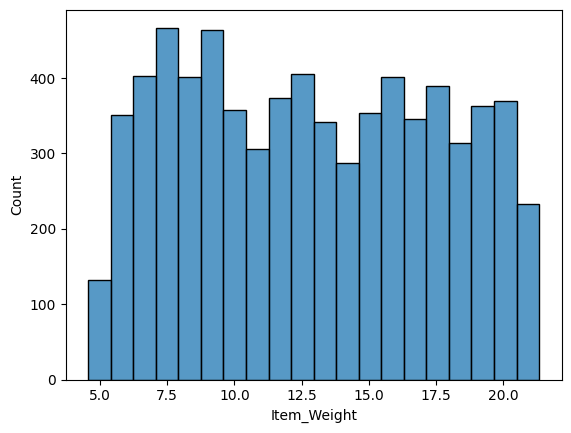

In [82]:
# histogram
sns.histplot(data['Item_Weight'])

In [106]:
# find the mean Item_Weight per Item_Type
mean_type_weight = data.groupby('Item_Type').agg("Item_Weight").mean()
mean_type_weight

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [113]:
# replace the null values in the Item_Weight column with the mean Item_Weight corresponding to the Item_Type

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Type'].map(mean_type_weight))

In [112]:
data[['Item_Weight','Item_Type']]

,Item_Weight,Item_Type
0,9.300,Dairy
1,5.920,Soft Drinks
2,17.500,Meat
3,19.200,Fruits and Vegetables
4,8.930,Household
...,...,...
8518,6.865,Snack Foods
8519,8.380,Baking Goods
8520,10.600,Health and Hygiene
8521,7.210,Snack Foods


#### Outlet Size

<AxesSubplot: xlabel='Outlet_Size', ylabel='Count'>

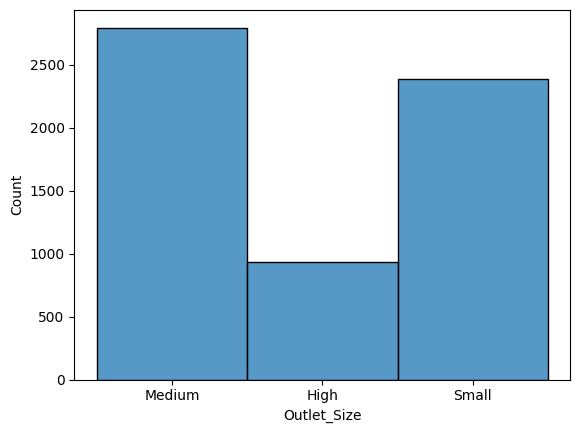

In [116]:
sns.histplot(data['Outlet_Size'])

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

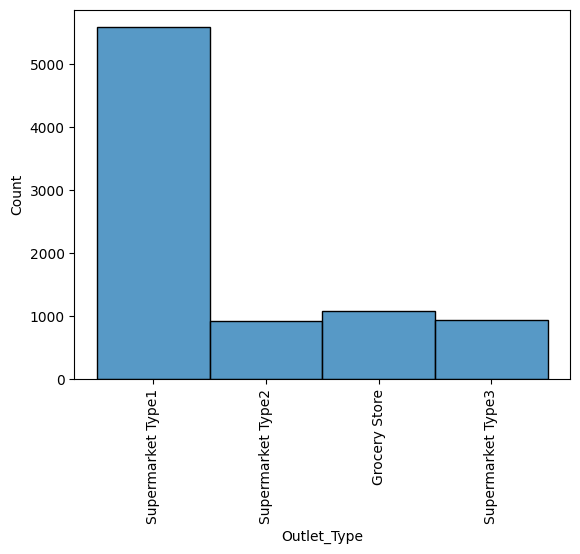

In [121]:
sns.histplot(data['Outlet_Type'])
plt.xticks(rotation=90)

In [150]:
outlet_df = data[['Outlet_Type', 'Outlet_Size']]
outlet_df

,Outlet_Type,Outlet_Size
0,Supermarket Type1,Medium
1,Supermarket Type2,Medium
2,Supermarket Type1,Medium
3,Grocery Store,Small
4,Supermarket Type1,High
...,...,...
8518,Supermarket Type1,High
8519,Supermarket Type1,Small
8520,Supermarket Type1,Small
8521,Supermarket Type2,Medium


In [ ]:
for data['Outlet_Type']

In [138]:
filter_df = data[data['Outlet_Type']=='Supermarket Type1']
filter_df.groupby('Outlet_Size').agg('Outlet_Type').count()

Outlet_Size
High       932
Medium     930
Small     1860
Name: Outlet_Type, dtype: int64

In [139]:
filter_df = data[data['Outlet_Type']=='Supermarket Type2']
filter_df.groupby('Outlet_Size').agg('Outlet_Type').count()

Outlet_Size
Medium    928
Name: Outlet_Type, dtype: int64

In [140]:
filter_df = data[data['Outlet_Type']=='Grocery Store']
filter_df.groupby('Outlet_Size').agg('Outlet_Type').count()

Outlet_Size
Small    528
Name: Outlet_Type, dtype: int64

In [141]:
filter_df = data[data['Outlet_Type']=='Supermarket Type3']
filter_df.groupby('Outlet_Size').agg('Outlet_Type').count()

Outlet_Size
Medium    935
Name: Outlet_Type, dtype: int64

In [146]:
Outlet_Type_Size_Dict = {'Supermarket Type1':'Small',
"Supermarket Type2":"Medium",
"Grocery Store":"Small",
'Supermarket Type3':"Medium"
}
Outlet_Type_Size_Dict

{'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Grocery Store': 'Small',
 'Supermarket Type3': 'Medium'}

In [147]:
# replace the null values in the Outlet_Size column with the mode of the Outlet_Size corresponding to the Outlet_Type

data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Type'].map(Outlet_Type_Size_Dict))

In [148]:
data[data['Outlet_Size'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**Task:** Check if there are no more missing values.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [151]:
data.to_csv("regression_exercise_cleaned.csv")